## 最全的激活函数总结
### 激活函数是神经网络中的非线性函数，为了增强网络的表示能力和学习能力，激活函数有以下几点性质 
<p>
1. 连续且可导（允许少数点上不可导）的非线性函数。可导的激活函数可以直接利用数值优化的方法来学习网络参数。<br>
2.激活函数及其导函数要尽可能的简单，有利于提高网络计算效率。<br>
3.激活函数的导函数的值域要在一个合适的区间内（不能太大也不能太小），否则会影响训练的效率和稳定性。<br>

### $sigmoid$
$sigmoid$函数（也被称为Logistic函数）函数函数表达式如下:<p>
$σ(x)=\frac{exp(x)}{exp(x)+exp(0)}=\frac{1}{1+exp(-x)}$<p>
导数为:<p>$\frac{d}{dx}σ(x)=σ(x)(1-σ(x))$
<p>
其图像如下图，是一个S型曲线，所以Sigmoid函数可以看做一个“挤压”函数，把一个实数域的输入“挤压”到(0,1)。当输入值在0附近时，Sigmoid函数近似为线性函数；当输入值靠近两端时，对输入进行抑制；输入越小，越接近于0；输入越大，越接近于1。

$\text{Sigmoid}(x) = \sigma(x) = \frac{1}{1 + \exp(-x)}$


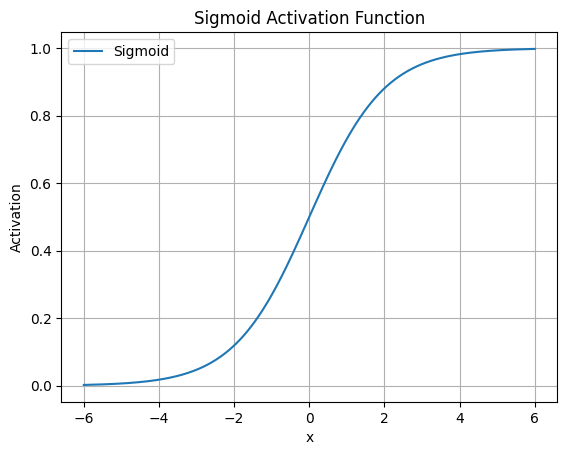

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import torch
from torch import nn

x = np.linspace(-6, 6, 600)
m0 = nn.Sigmoid()
output0 = m0(torch.Tensor(x))
plt.plot(x, output0, label='Sigmoid')
plt.title('Sigmoid Activation Function')
plt.xlabel('x')
plt.ylabel('Activation')
plt.grid()
plt.legend()
plt.show()


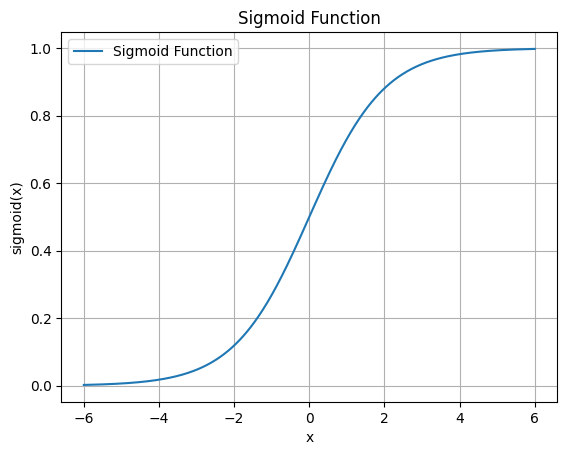

In [3]:
# 自定义激活函数
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))
# 创建x区间从-6到6，切600份
x = np.linspace(-6, 6, 600)
y = sigmoid(x)

# 绘制sigmoid函数图像
plt.plot(x, y, label='Sigmoid Function')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.legend()
plt.show()

Sigmoid激活函数的缺点：

倾向于梯度消失
函数输出不是以0为中心，会使其后一层的神经元的输入发生偏置偏移(Bias Shift)，进而使得梯度下降的收敛速度变慢，也就是会降低权重更新的效率
公式中包括指数运算，计算机运行较慢

### $tanh$ 
$Tanh$ 函数也是一种S型函数，其定义为:<p>
$\text{Tanh}(x) = \tanh(x) = \frac{\exp(x) - \exp(-x)} {\exp(x) + \exp(-x)}$<p>
Tanh函数可以看做放大并平移的Sigmoid函数，其值域为(-1,1)，并且Tanh与Sigmoid函数关系如下式：<p>
$tanh(x)=2\sigma(2x)-1$




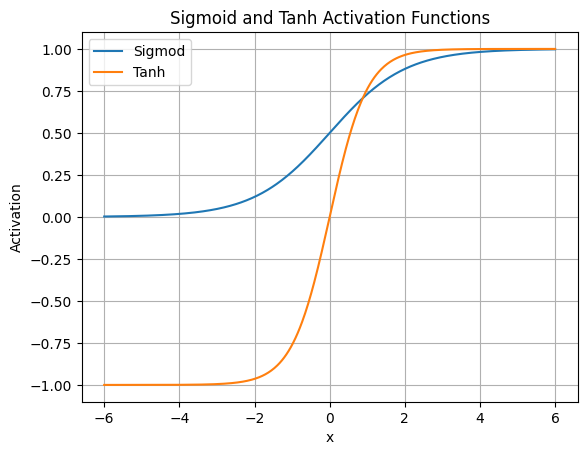

In [4]:
x = np.linspace(-6, 6, 600)
m0 = nn.Sigmoid()
output0 = m0(torch.Tensor(x))
plt.plot(x, output0, label='Sigmod')
m0_1 = nn.Tanh()
output0_1 = m0_1(torch.Tensor(x))
plt.plot(x, output0_1, label='Tanh')

plt.title("Sigmoid and Tanh Activation Functions")
plt.xlabel("x")
plt.ylabel("Activation")
plt.grid()
plt.legend()
plt.show()


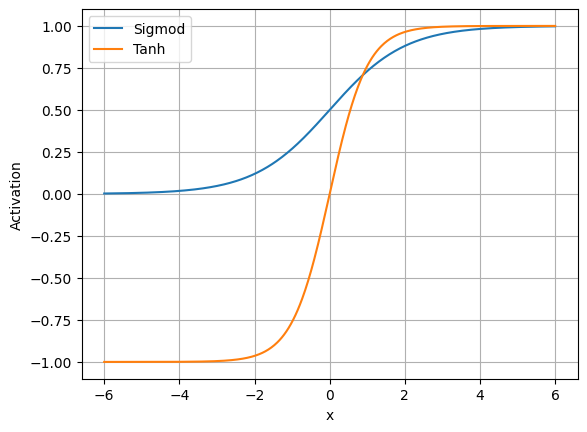

In [10]:
# 自定义激活函数
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return 2*sigmoid(2*x)-1

# 创建x区间从-6到6，切600份
x = np.linspace(-6, 6, 600)
output0 = sigmoid(x)
plt.plot(x, output0, label='Sigmod')

output0_1 = tanh(x)
plt.plot(x, output0_1, label='Tanh')

# 绘制sigmoid函数图像
plt.xlabel('x')
plt.ylabel('Activation')
plt.grid(True)
plt.legend()
plt.show()

$ReLU$<p>
ReLU（Rectified Linear unit）是最常见的激活函数，其公式为：<p>
$\text{ReLU}(x) = (x)^+ = \max(0, x)$<p>
$
f(x) = 
\begin{cases} 
x, & \text{if } x \geq 0 \\ 
0, & \text{if } x < 0 
\end{cases}
$

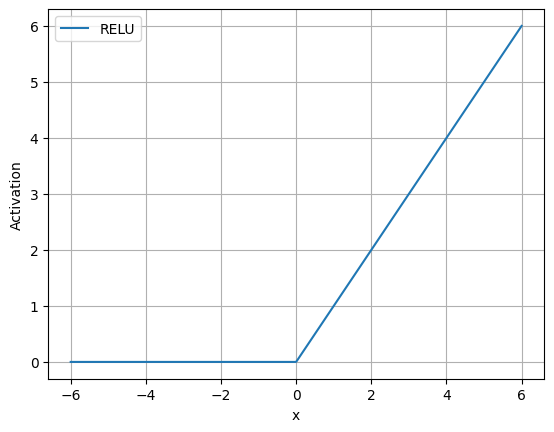

In [13]:
x = np.linspace(-6, 6, 600)
m0 = nn.ReLU()
output0 = m0(torch.Tensor(x))
plt.plot(x, output0, label='RELU')
plt.xlabel("x")
plt.ylabel("Activation")
plt.grid()
plt.legend()
plt.show()


In [ ]:
### 手搓 relu
def relu(x):
    return max(0, x) if isinstance(x, (int, float)) else np.maximum(0, x)

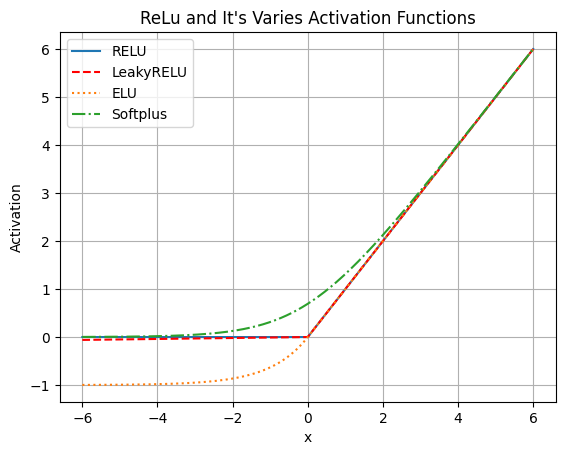

In [11]:
x = np.linspace(-6, 6, 600)
m0 = nn.ReLU()
output0 = m0(torch.Tensor(x))
plt.plot(x, output0, label='RELU')
m1 = nn.LeakyReLU()
output1 = m1(torch.Tensor(x))
plt.plot(x, output1, label='LeakyRELU', color='red', linestyle='--')
m2 = nn.ELU()
output2 = m2(torch.Tensor(x))
plt.plot(x, output2, label='ELU', linestyle='dotted')
m3 = nn.Softplus()
output3 = m3(torch.Tensor(x))
plt.plot(x, output3, label='Softplus', linestyle='-.')

plt.title("ReLu and It's Varies Activation Functions")
plt.xlabel("x")
plt.ylabel("Activation")
plt.grid()
plt.legend()
plt.show()


ReLU函数的优点是：1. 采用ReLU的神经元只需要进行加、乘和比较的操作，计算上更加高效。2. ReLU函数被认为具有生物学合理性，比如单侧抑制、宽兴奋边界。在生物神经网络中，同时处于兴奋状态的神经元非常稀疏，比如人脑中在同一时刻大概只有 1% ∼ 4% 的神经元处于活跃状态。Sigmoid 型激活函数会导致一个非稀疏的神经网络，而 ReLU 却具有很好的稀疏性，大约 50% 的神经元会处于激活状态．3. 相对于sigmoid函数的两端饱和，ReLU函数为左饱和函数，且在x>0时的导数为1，所以相比之下一定程度上缓解了梯度消失问题，加速梯度下降的收敛速度。

ReLU函数的缺点是：1. 函数输出是非零中心化的，会使其后一层的神经元的输入发生偏置偏移(Bias Shift)，进而使得梯度下降的收敛速度变慢。2. ReLU神经元在训练时比较容易”dead"，如果参数在一次不恰当的更新后，第一个隐藏层中的某个ReLU神经元在所有的训练数据上都不能被激活，那么这个神经元自身参数的梯度永远都会是0，在以后的训练过程中永远不能被激活，这种现象被称为死亡ReLU问题(Dying ReLU Problem)。(其他隐藏层也是有可能发生的)

为了避免ReLU的缺点，有以下几种广泛使用的ReLU变种
